#  <center><u>***PROJECT-9***</u></center>

 - # ***PART-A***

**The municipal corporation of a city needs extra money for its development plans for the city. The mayor of the city proposes a new 1% tax on businesses that is proportional to the amount spent to lease property in the city. Find out the revenue that 1% tax will generate. 4500 businesses in the city lease the property. The data for the annual cost of the lease for a sample of 233 recent lease is attached.**

***Q1) Load the data.***

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns

tax=pd.read_csv('property_tax.csv')
tax

,Total Lease Cost
0,329959
1,298073
2,2820213
3,883773
4,359745
...,...
218,979391
219,1217664
220,383177
221,860709


***Q2) Describe the data.***

To obtain the confidence interval for the amount raised by the tax, we need the confidence interval for μ, the average cost of lease.<br>
There are 4500 businesses in the city that lease property.<br>
By multiplying the 95% CI for μ by 1% of 4500, we can find the 95% CI for total income.

<u>**Min and Max Values of the property tax are**</u>

In [2]:
print('The minimum value of the property tax:',tax['Total Lease Cost'].min())
print('The maximum value of the property tax:',tax['Total Lease Cost'].max())

The minimum value of the property tax: 20409
The maximum value of the property tax: 2820213


<u>**Plot the Box Plot and Histogram**</u>

C:\Users\EKANSHI SINGHAL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\EKANSHI SINGHAL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


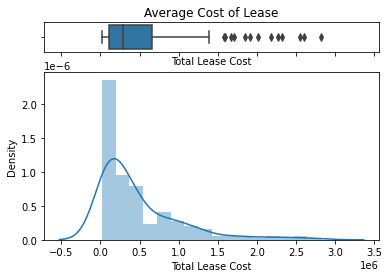

In [3]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(tax["Total Lease Cost"],ax=ax_box).set(title='Average Cost of Lease')
sns.distplot(tax["Total Lease Cost"],ax=ax_hist)
plt.show()

The histogram of the lease cost is skewed. One of the cost is nearly $3,000,000 per year where as majority of the costs are far smaller.<br>
In this case, we will use the 95% confidence interval of μ. Before that we shall calculate important summary statistics of the lease cost.

In [51]:
mean=print('The mean is:',tax['Total Lease Cost'].mean())
stdev=print('The standard deviation is:',tax['Total Lease Cost'].std())
n=print('The total number of sample(n) is:',tax['Total Lease Cost'].count())
K3=print('The skewness is:',tax['Total Lease Cost'].skew())
K4=print('The Kurtosis is:',tax['Total Lease Cost'].kurtosis())
se=print('The standard error is:',stdev/np.sqrt(n))

The mean is: 478603.4798206278
The standard deviation is: 535342.5637301835
The total number of sample(n) is: 223
The skewness is: 1.953472329294872
The Kurtosis is: 4.137508828414167


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

***Q3) Check the Simple Random Condition and sample size condition.***

<u>**SRS Condition:**</u> The sample consists of less than **10%** of the population of the lease. Population size is **4500** whereas randomly chosen sample size is **223**.

In [5]:
from scipy.stats import skew,kurtosis
print('Skewness:',10*np.square(skew(tax)))
print('Kurtosis:',10*np.absolute(kurtosis(tax)))

Skewness: [37.64794173]
Kurtosis: [40.18534412]


<u>**Sample Size Condition:**</u> The sample size is ***n=223***. **10$K_3^{2}$ ≈ 38** and **10$|K_4|$ ≈ 41,** This condition met. 

***Q4) Calculate $t_{\alpha/2,n-1}$***

In [44]:
tval=t.ppf(1.95/2.,223-1)
tval

1.9707073953190277

Value of $t_{\alpha/2,n-1}$ = 1.97

In [45]:
mean + se*tval

TypeError: unsupported operand type(s) for +: 'NoneType' and 'float'

In [47]:
mean = tax['Total Lease Cost'].mean()
>>> sdev = tax['Total Lease Cost'].std()
>>> n = tax['Total Lease Cost'].count()
>>> K3 = tax['Total Lease Cost'].skew()
>>> K4 = tax['Total Lease Cost'].kurtosis()
>>> mean, sdev, n, K3, K4

se= sdev/np.sqrt(n)
>>> se

35849.18962885723